In [1]:
# ### Fine-Tuning YOLOv9 for Vehicle Detection

# Final Testing 

# Experiment Purpose: 
# Test

In [2]:
# Check GPU
!nvidia-smi

Thu May  9 22:20:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA H100                    On  | 00000000:04:00.0 Off |                   On |
| N/A   23C    P0              65W / 699W |     88MiB / 95830MiB |     N/A      Default |
|                                         |                      |              Enabled |
+-----------------------------------------+----------------------+--

In [4]:
!pip install pickleshare

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Home
%cd /home/7/ut03197
import os
HOME = os.getcwd()
print(HOME)

/home/7/ut03197
/home/7/ut03197


In [6]:
# Clone and install YOLOv9
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 40.86 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/home/7/ut03197/yolov9
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer 

In [12]:
# Run this command to add the directory to your PATH
!export PATH="$PATH:/home/7/ut03197/.local/bin"


In [8]:
# Download YOLOv9 pre-trained model weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
# See the downloaded weights
!ls -la {HOME}/weights

total 151048
drwxr-xr-x  2 ut03197 tsubame-users      4096 May  9 22:19 .
drwx------ 11 ut03197 tsubame-users      4096 May  9 22:19 ..
-rw-r--r--  1 ut03197 tsubame-users  51508261 Feb 18 21:36 gelan-c.pt
-rw-r--r--  1 ut03197 tsubame-users 103153312 Feb 18 21:36 yolov9-c.pt


In [13]:
!pip install roboflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached idna-2.10-py2.py3-none-any.whl.metadata (9.1 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
Using cached idna-2.10-py2.py3-none-any.whl (58 kB)


In [5]:
# !pip install roboflow
%cd {HOME}/yolov9

from roboflow import Roboflow
rf = Roboflow(api_key="bPfOmrVTX1EqhunmqGCA")
project = rf.workspace("specialist").project("vehicle-detection-poribohon-bd")
version = project.version(1)
dataset = version.download("yolov9")


/home/7/ut03197/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicle-detection-Poribohon-BD-1 in yolov9:: 100%|██████████| 47286/47286 [00:52<00:00, 902.25it/s] 


In [6]:
# Hyperparameter tuning
# See the hyperparameters
# Install necessary libraries if not already installed
!pip install pyyaml

# Import required libraries
import yaml

# Define the file name
file_name = f"{HOME}/yolov9/data/hyps/hyp.scratch-high.yaml"

# Read the content from the YAML file
with open(file_name, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Print the content of the YAML file
print(yaml.dump(yaml_data))

Defaulting to user installation because normal site-packages is not writeable
anchor_t: 5.0
box: 7.5
cls: 0.5
cls_pw: 1.0
copy_paste: 0.3
degrees: 0.0
dfl: 1.5
fl_gamma: 0.0
fliplr: 0.5
flipud: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
iou_t: 0.2
lr0: 0.01
lrf: 0.01
mixup: 0.15
momentum: 0.937
mosaic: 1.0
obj_pw: 1.0
perspective: 0.0
scale: 0.9
shear: 0.0
translate: 0.1
warmup_bias_lr: 0.1
warmup_epochs: 3.0
warmup_momentum: 0.8
weight_decay: 0.0005



In [7]:
# Update the hyperparameters if needed, otherwise IGNORE

# Read the content from the YAML file
with open(file_name, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Update the hyperparameters with the new values
new_hyperparameters = {
    # 'lrf': 0.01,   
    'momentum': 0.85,
    'mixup': 0.2,
    # 'lr0' : 0.01,
    'warmup_momentum': .7
}

# Update the hyperparameters with the new values
for key, value in new_hyperparameters.items():
    yaml_data[key] = value

# Write the updated content back to the YAML file
with open(file_name, 'w') as file:
    yaml.dump(yaml_data, file)

print("YAML file updated successfully.")

# Print after update

# Read the content from the YAML file
with open(file_name, 'r') as file:
    yaml_data = yaml.safe_load(file)

# Print the content of the YAML file
print(yaml.dump(yaml_data))

YAML file updated successfully.
anchor_t: 5.0
box: 7.5
cls: 0.5
cls_pw: 1.0
copy_paste: 0.3
degrees: 0.0
dfl: 1.5
fl_gamma: 0.0
fliplr: 0.5
flipud: 0.0
hsv_h: 0.015
hsv_s: 0.7
hsv_v: 0.4
iou_t: 0.2
lr0: 0.01
lrf: 0.01
mixup: 0.2
momentum: 0.85
mosaic: 1.0
obj_pw: 1.0
perspective: 0.0
scale: 0.9
shear: 0.0
translate: 0.1
warmup_bias_lr: 0.1
warmup_epochs: 3.0
warmup_momentum: 0.7
weight_decay: 0.0005



In [15]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.01 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.01, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.01 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 59.4MB/s]
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
val: New cache created: /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labels.cache
                 Class 

In [16]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.1 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.1, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.1 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-3:
Traceback (most recent call last):
  File "/apps/t4/rhel9/free/jupyterlab/4.1.4/gcc11.4.1/pytho

In [17]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.3 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.3, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.3 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-3:
Traceback (most recent call last):
  File "/apps/t4/rhel9/free/jupyterlab/4.1.4/gcc11.4.1/pytho

In [18]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.1 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.1, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.1 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
val: New cache created: /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread

In [ ]:
# valid set renamed to valid_original
# test set renamed to valid

In [19]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.01 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.01, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.01 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-3:
Traceback (most recent call last):
  File "/apps/t4/rhel9/free/jupyterlab/4.1.4/gcc11.4.1/pyt

In [20]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.001 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-3:
Traceback (most recent call last):
  File "/apps/t4/rhel9/free/jupyterlab/4.1.4/gcc11.4.1/python3.9.18_b/lib/python3.9/threading.py", line 980, in _bootstrap_inne

In [21]:
# # Validate custom model
%cd {HOME}/yolov9
!python val_dual.py \
--img 640 --batch 32 --conf 0.3 --iou 0.5 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/best.pt

/home/7/ut03197/yolov9
val_dual: data=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/data.yaml, weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], batch_size=32, imgsz=640, conf_thres=0.3, iou_thres=0.5, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.3 > 0.001 produces invalid results
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
val: Scanning /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/labe
                 Class     Images  Instances          P          R      mAP50   Exception in thread Thread-3:
Traceback (most recent call last):
  File "/apps/t4/rhel9/free/jupyterlab/4.1.4/gcc11.4.1/pytho

In [24]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {dataset.location}/valid/images 

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-113-_jpg.rf.73a714cc5a461f8f8c47dacf696c6c10.jpg: 640x640 1 bicycle, 13.6ms
image 2/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-128-_jpg.rf.947f76

In [26]:
# Shuffle and select 16 images from test image results from 16 different classes (15 unique, and 1 mixed class image)

import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def print_inference(image_dir):

    # Directory containing the images
    # Get list of all file names
    file_names = os.listdir(image_dir)
    
    # Shuffle the list randomly
    random.shuffle(file_names)
    
    count = 0
    class_done = []
    images = []
    
    # Loop through and print all file names
    for filename in file_names:
        current_class = filename[0:3]
        if current_class in class_done:
            continue
        count += 1
        images.append(filename)
        class_done.append(current_class)
        if count == 16:
            break
    
    ### DISPLAY the 16 images in a grid 4x4
    
    # List of images from earlier cell
    
    # Define the grid
    grid_width = 4
    grid_height = (len(images) + grid_width - 1) // grid_width
    
    # Create a figure and axes
    fig, axes = plt.subplots(grid_height, grid_width, figsize=(8, 8))
    
    # Display images
    for i, image_name in enumerate(images):
        row = i // grid_width
        col = i % grid_width
    
        image_path = os.path.join(image_dir, image_name)
        image = Image.open(image_path)
    
        axes[row, col].imshow(image)
        axes[row, col].axis('off')
    
    # Remove empty subplots
    for i in range(len(images), grid_width * grid_height):
        row = i // grid_width
        col = i % grid_width
        axes[row, col].remove()
    
    
    plt.tight_layout()
    plt.show()


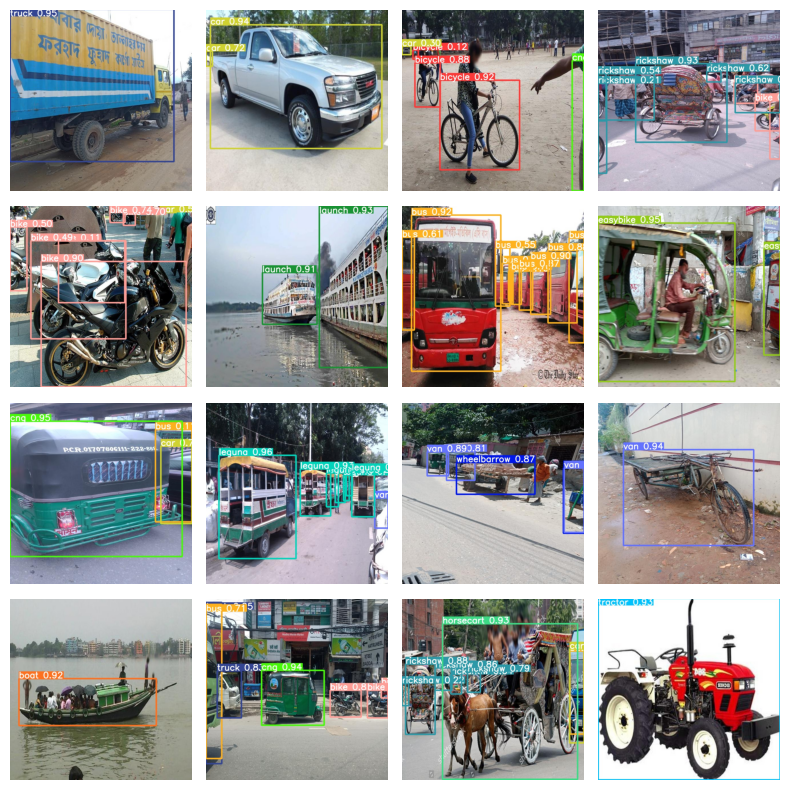

In [27]:
image_dir = os.path.join(HOME, "yolov9/runs/detect/exp")
print_inference(image_dir)

In [28]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {dataset.location}/valid/images 

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-113-_jpg.rf.73a714cc5a461f8f8c47dacf696c6c10.jpg: 640x640 1 bicycle, 13.4ms
image 2/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-128-_jpg.rf.947f76

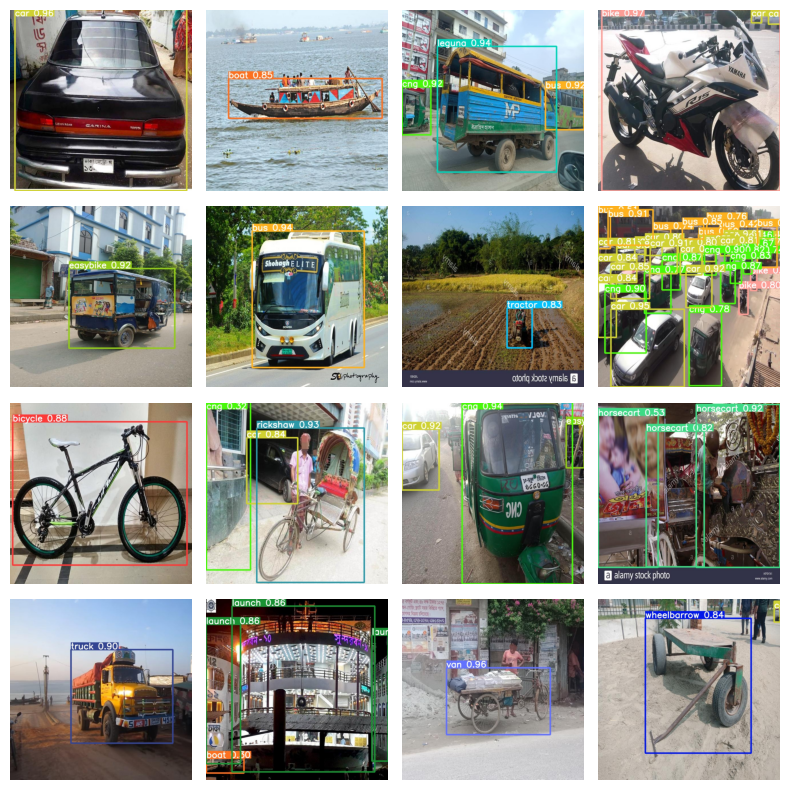

In [29]:
image_dir = os.path.join(HOME, "yolov9/runs/detect/exp2")
print_inference(image_dir)

In [30]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {dataset.location}/valid/images 

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-113-_jpg.rf.73a714cc5a461f8f8c47dacf696c6c10.jpg: 640x640 1 bicycle, 13.2ms
image 2/908 /home/7/ut03197/yolov9/vehicle-detection-Poribohon-BD-1/valid/images/bicycle-128-_jpg.rf.947f76

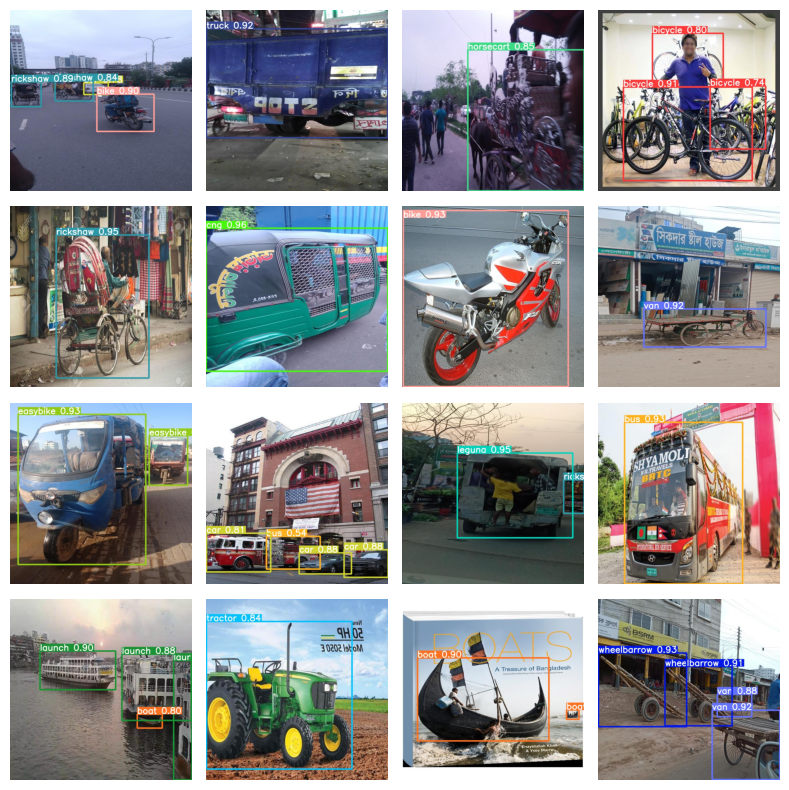

In [31]:
image_dir = os.path.join(HOME, "yolov9/runs/detect/exp3")
print_inference(image_dir)

In [33]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/1.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/1.jpg: 640x480 1 bike, 2 cars, 1 cng, 11 rickshaws, 1 wheelbarrow, 105.5ms
Speed: 0.3ms pre-process, 105.5ms inference, 177.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


In [34]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/1.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/1.jpg: 640x480 2 cars, 1 cng, 7 rickshaws, 1 wheelbarrow, 101.5ms
Speed: 0.3ms pre-process, 101.5ms inference, 167.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


In [35]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/1.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/1.jpg: 640x480 2 bikes, 1 bus, 3 cars, 1 cng, 15 rickshaws, 1 wheelbarrow, 101.1ms
Speed: 0.3ms pre-process, 101.1ms inference, 186.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


In [36]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.01 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/1.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.01, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/1.jpg: 640x480 4 bikes, 4 buss, 8 cars, 2 cngs, 2 easybikes, 40 rickshaws, 1 van, 1 wheelbarrow, 106.7ms
Speed: 3.0ms pre-process, 106.7ms inference, 293.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp7


In [37]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/2.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/2.jpg: 640x480 1 bike, 2 buss, 1 car, 1 cng, 9 rickshaws, 1 truck, 105.8ms
Speed: 2.2ms pre-process, 105.8ms inference, 235.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp8


In [38]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/2.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/2.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/2.jpg: 640x480 1 bus, 1 car, 1 cng, 7 rickshaws, 100.6ms
Speed: 0.3ms pre-process, 100.6ms inference, 164.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp9


In [39]:
# Test the model

!python detect_dual.py \
--img 1280 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/2.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/2.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/2.jpg: 1280x960 2 buss, 3 cars, 3 cngs, 11 rickshaws, 104.3ms
Speed: 0.4ms pre-process, 104.3ms inference, 159.9ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp10


In [40]:
# Test the model

!python detect_dual.py \
--img 1280 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/2.jpg

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/2.jpg, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
image 1/1 /home/7/ut03197/yolov9/runs/testing_special/2.jpg: 1280x960 2 buss, 3 cars, 1 cng, 8 rickshaws, 103.8ms
Speed: 0.4ms pre-process, 103.8ms inference, 165.1ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to runs/detect/exp11


In [41]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/a.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/a.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/630) /home/7/ut03197/yolov9/runs/testing_special/a.mp4: 640x640 1 bike, 1 bus, 5 cngs, 1 easybike, 7 rickshaws, 1 truck, 13.6ms
video 1/1 (2/630) /home/7/ut03197/yolov9/runs/testing_special/a.mp4: 640x640 1 bike, 1 bus, 5 cngs, 1 easybike, 7 rickshaws, 14.0ms
video 1/1 (3/630) 

In [42]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/a.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/a.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/630) /home/7/ut03197/yolov9/runs/testing_special/a.mp4: 640x640 1 bike, 3 cngs, 1 easybike, 4 rickshaws, 13.8ms
video 1/1 (2/630) /home/7/ut03197/yolov9/runs/testing_special/a.mp4: 640x640 1 bike, 3 cngs, 1 easybike, 4 rickshaws, 14.1ms
video 1/1 (3/630) /home/7/ut03197/yolov9/

In [43]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/b.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/b.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 13.7ms
video 1/1 (2/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 13.9ms
video 1/1 (3/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 13.0ms
video 1/1 (4/322) 

In [44]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/b.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/b.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 13.4ms
video 1/1 (2/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 13.7ms
video 1/1 (3/322) /home/7/ut03197/yolov9/runs/testing_special/b.mp4: 640x640 1 bus, 12.8ms
video 1/1 (4/322) 

In [45]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/c.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/c.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/268) /home/7/ut03197/yolov9/runs/testing_special/c.mp4: 640x640 2 cars, 2 cngs, 2 rickshaws, 13.4ms
video 1/1 (2/268) /home/7/ut03197/yolov9/runs/testing_special/c.mp4: 640x640 2 cars, 2 cngs, 2 rickshaws, 1 truck, 13.7ms
video 1/1 (3/268) /home/7/ut03197/yolov9/runs/testing_sp

In [46]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/c.mp4

detect_dual: weights=['/home/7/ut03197/yolov9/runs/train/best.pt'], source=/home/7/ut03197/yolov9/runs/testing_special/c.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.9.18 torch-2.3.0+cu121 CUDA:0 (NVIDIA H100 MIG 4g.47gb, 47488MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50990970 parameters, 0 gradients, 237.8 GFLOPs
video 1/1 (1/268) /home/7/ut03197/yolov9/runs/testing_special/c.mp4: 640x640 1 car, 1 cng, 13.7ms
video 1/1 (2/268) /home/7/ut03197/yolov9/runs/testing_special/c.mp4: 640x640 1 car, 1 cng, 2 rickshaws, 1 truck, 14.0ms
video 1/1 (3/268) /home/7/ut03197/yolov9/runs/testing_special/c.mp4: 640x

In [ ]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.3 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/d.mp4

In [ ]:
# Test the model

!python detect_dual.py \
--img 640 --conf 0.5 --device 0 \
--weights {HOME}/yolov9/runs/train/best.pt \
--source {HOME}/yolov9/runs/testing_special/d.mp4